# Data Cleaning


## Import

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
from google.colab import drive
import pandas as pd
import matplotlib.ticker as ticker
import matplotlib.pyplot as plt
import seaborn as sns
import json

drive.mount('/content/drive')
column_n = ['NewsId', 'Category', 'SubCat', 'Title', 'Abstract', 'url', 'TitleEnt', 'AbstractEnt']
column_b = ['ImpressionId', 'UserId', 'Time', 'History', 'Impressions']

# import the datasets
test_n_df = pd.read_csv('/content/drive/MyDrive/MSNEWS/MIND_test/news.tsv', sep='\t', header=None, names=column_n)
test_b_df = pd.read_csv('/content/drive/MyDrive/MSNEWS/MIND_test/behaviors.tsv', sep='\t', header=None, names=column_b)
train_n_df = pd.read_csv('/content/drive/MyDrive/MSNEWS/MIND_train/news.tsv', sep='\t', header=None, names=column_n)
train_b_df = pd.read_csv('/content/drive/MyDrive/MSNEWS/MIND_train/behaviors.tsv', sep='\t', header=None, names=column_b)
valid_n_df = pd.read_csv('/content/drive/MyDrive/MSNEWS/MIND_valid/news.tsv', sep='\t', header=None, names=column_n)
valid_b_df = pd.read_csv('/content/drive/MyDrive/MSNEWS/MIND_valid/behaviors.tsv', sep='\t', header=None, names=column_b)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Check the information of the datasets.

In [ ]:
test_n_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120959 entries, 0 to 120958
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   NewsId       120959 non-null  object
 1   Category     120959 non-null  object
 2   SubCat       120959 non-null  object
 3   Title        120959 non-null  object
 4   Abstract     114256 non-null  object
 5   url          120958 non-null  object
 6   TitleEnt     120953 non-null  object
 7   AbstractEnt  120950 non-null  object
dtypes: object(8)
memory usage: 7.4+ MB


In [ ]:
train_n_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101527 entries, 0 to 101526
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   NewsId       101527 non-null  object
 1   Category     101527 non-null  object
 2   SubCat       101527 non-null  object
 3   Title        101527 non-null  object
 4   Abstract     96112 non-null   object
 5   url          101527 non-null  object
 6   TitleEnt     101524 non-null  object
 7   AbstractEnt  101521 non-null  object
dtypes: object(8)
memory usage: 6.2+ MB


In [ ]:
valid_n_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72023 entries, 0 to 72022
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   NewsId       72023 non-null  object
 1   Category     72023 non-null  object
 2   SubCat       72023 non-null  object
 3   Title        72023 non-null  object
 4   Abstract     68400 non-null  object
 5   url          72023 non-null  object
 6   TitleEnt     72021 non-null  object
 7   AbstractEnt  72018 non-null  object
dtypes: object(8)
memory usage: 4.4+ MB


In [ ]:
test_b_df.info(null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2370727 entries, 0 to 2370726
Data columns (total 5 columns):
 #   Column        Non-Null Count    Dtype 
---  ------        --------------    ----- 
 0   ImpressionId  2370727 non-null  int64 
 1   UserId        2370727 non-null  object
 2   Time          2370727 non-null  object
 3   History       2341619 non-null  object
 4   Impressions   2370727 non-null  object
dtypes: int64(1), object(4)
memory usage: 90.4+ MB


In [ ]:
train_b_df.info(null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2232748 entries, 0 to 2232747
Data columns (total 5 columns):
 #   Column        Non-Null Count    Dtype 
---  ------        --------------    ----- 
 0   ImpressionId  2232748 non-null  int64 
 1   UserId        2232748 non-null  object
 2   Time          2232748 non-null  object
 3   History       2186683 non-null  object
 4   Impressions   2232748 non-null  object
dtypes: int64(1), object(4)
memory usage: 85.2+ MB


In [ ]:
valid_b_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 376471 entries, 0 to 376470
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   ImpressionId  376471 non-null  int64 
 1   UserId        376471 non-null  object
 2   Time          376471 non-null  object
 3   History       365201 non-null  object
 4   Impressions   376471 non-null  object
dtypes: int64(1), object(4)
memory usage: 14.4+ MB


Now, let's have a preview of our data.

In [ ]:
test_n_df.head()

,NewsId,Category,SubCat,Title,Abstract,url,TitleEnt,AbstractEnt
0,N88753,lifestyle,lifestyleroyals,"The Brands Queen Elizabeth, Prince Charles, an...","Shop the notebooks, jackets, and more that the...",https://assets.msn.com/labs/mind/AAGH0ET.html,"[{""Label"": ""Prince Philip, Duke of Edinburgh"",...",[]
1,N45436,news,newsscienceandtechnology,Walmart Slashes Prices on Last-Generation iPads,Apple's new iPad releases bring big deals on l...,https://assets.msn.com/labs/mind/AABmf2I.html,"[{""Label"": ""IPad"", ""Type"": ""J"", ""WikidataId"": ...","[{""Label"": ""IPad"", ""Type"": ""J"", ""WikidataId"": ..."
2,N23144,health,weightloss,50 Worst Habits For Belly Fat,These seemingly harmless habits are holding yo...,https://assets.msn.com/labs/mind/AAB19MK.html,"[{""Label"": ""Adipose tissue"", ""Type"": ""C"", ""Wik...","[{""Label"": ""Adipose tissue"", ""Type"": ""C"", ""Wik..."
3,N86255,health,medical,Dispose of unwanted prescription drugs during ...,NaN,https://assets.msn.com/labs/mind/AAISxPN.html,"[{""Label"": ""Drug Enforcement Administration"", ...",[]
4,N93187,news,newsworld,The Cost of Trump's Aid Freeze in the Trenches...,Lt. Ivan Molchanets peeked over a parapet of s...,https://assets.msn.com/labs/mind/AAJgNsz.html,[],"[{""Label"": ""Ukraine"", ""Type"": ""G"", ""WikidataId..."


In [ ]:
test_b_df.head()

,ImpressionId,UserId,Time,History,Impressions
0,1,U64099,11/19/2019 11:37:45 AM,N121133 N104200 N43255 N55860 N128965 N38014 N...,N101071 N15647 N83400 N124838 N57092 N64623 N6...
1,2,U231077,11/19/2019 5:28:08 AM,N45124 N84730 N45128 N104312 N70022 N99111 N26...,N14657 N51253 N49521 N126571 N74286 N101071 N1...
2,3,U606012,11/19/2019 4:46:23 AM,N59893 N84662 N90686 N33265 N127225 N120859 N6...,N74286 N9250 N26898 N123737 N98301 N80580 N456...
3,4,U320649,11/21/2019 6:03:51 AM,N110863 N7889 N86335 N85056 N115743 N63372 N19...,N119559 N37657 N108085 N91287 N39136 N130190 N...
4,5,U357840,11/22/2019 10:36:19 AM,N98596 N85005 N15713 N67779 N47961 N55571 N666...,N60658 N43496 N65220 N9125 N63136 N83728 N3208...


Check the unique values in the columns.

In [ ]:
test_b_df['UserId'].nunique()

702005

In [ ]:
print(test_n_df['Category'].unique(), test_n_df['SubCat'].nunique())
print(train_n_df['Category'].unique(), train_n_df['SubCat'].nunique())
print(valid_n_df['Category'].unique(), valid_n_df['SubCat'].nunique())

['lifestyle' 'news' 'health' 'sports' 'weather' 'entertainment'
 'foodanddrink' 'autos' 'travel' 'video' 'finance' 'tv' 'movies' 'music'
 'kids' 'middleeast' 'games' 'northamerica'] 290
['lifestyle' 'news' 'health' 'sports' 'weather' 'entertainment'
 'foodanddrink' 'autos' 'travel' 'video' 'finance' 'tv' 'movies' 'music'
 'kids' 'middleeast' 'games' 'northamerica'] 285
['lifestyle' 'health' 'news' 'sports' 'weather' 'entertainment'
 'foodanddrink' 'autos' 'travel' 'video' 'tv' 'finance' 'movies' 'music'
 'kids' 'middleeast' 'games'] 269


In [ ]:
# Check duplicates
duplicates = train_b_df.duplicated()
has = duplicates.any()
print(has)

False


## Cleaning

### Drop URL & Impression

Drop the columns that we will not use in our analysis.

In [ ]:
test_n_df = test_n_df.drop('url', axis=1)
train_n_df = train_n_df.drop('url', axis=1)
valid_n_df = valid_n_df.drop('url', axis=1)

In [ ]:
test_b_df1 = test_b_df.drop('Impressions', axis=1)
train_b_df1 = train_b_df.drop('Impressions', axis=1)
valid_b_df1 = valid_b_df.drop('Impressions', axis=1)

test_b_df1

,ImpressionId,UserId,Time,History
0,1,U64099,11/19/2019 11:37:45 AM,N121133 N104200 N43255 N55860 N128965 N38014 N...
1,2,U231077,11/19/2019 5:28:08 AM,N45124 N84730 N45128 N104312 N70022 N99111 N26...
2,3,U606012,11/19/2019 4:46:23 AM,N59893 N84662 N90686 N33265 N127225 N120859 N6...
3,4,U320649,11/21/2019 6:03:51 AM,N110863 N7889 N86335 N85056 N115743 N63372 N19...
4,5,U357840,11/22/2019 10:36:19 AM,N98596 N85005 N15713 N67779 N47961 N55571 N666...
...,...,...,...,...
2370722,2370723,U584874,11/21/2019 6:35:29 AM,N72571 N14240 N26193 N82055 N23920 N41710
2370723,2370724,U584857,11/22/2019 7:13:47 AM,N57191 N54360 N1596 N61590 N104737 N71977 N773...
2370724,2370725,U160629,11/20/2019 10:38:57 PM,N105366 N51167 N66294 N71092 N92463 N38171 N11...
2370725,2370726,U406290,11/21/2019 8:24:26 AM,N55903 N85484 N12015 N121551 N65119 N15471 N11...


### Take sample on Users

Since we have a very large dataset, we would take a sample on users to study their behaviors.

In [ ]:
unique_users = test_b_df1['UserId'].unique()
sampled_users = pd.Series(unique_users).sample(frac=0.01, random_state=42)
sampled_test = test_b_df1[test_b_df1['UserId'].isin(sampled_users)]

sampled_test

,ImpressionId,UserId,Time,History
7,8,U84394,11/18/2019 1:43:17 PM,N54656 N128643 N92838 N106692 N50914 N119997 N...
52,53,U571456,11/22/2019 7:18:21 PM,N118005 N86208 N82746 N90939 N52435 N98214 N97...
54,55,U335328,11/16/2019 4:47:52 PM,N62205 N35278 N13996 N65757 N90507 N109238 N94...
58,59,U66995,11/19/2019 12:18:41 PM,N63092 N85659 N65119 N73122 N51724 N120705 N45...
158,159,U524661,11/22/2019 9:52:11 AM,N77001 N128643 N112196 N98238 N130269 N85056 N...
...,...,...,...,...
2370487,2370488,U606058,11/17/2019 9:45:53 PM,N41122 N39472 N4833 N9740 N65259 N5128 N19474 ...
2370491,2370492,U666365,11/17/2019 7:41:26 AM,N39472 N86208 N82753 N76065 N121944 N114156 N3...
2370493,2370494,U76422,11/20/2019 5:02:05 PM,N102357 N21710 N9276 N86141 N51893 N93049 N127...
2370651,2370652,U217845,11/21/2019 11:17:57 AM,N23891 N9375 N63676 N87446 N121551 N130260 N49...


In [ ]:
print(sampled_test['UserId'].nunique(), test_b_df1['UserId'].nunique())

7020 702005


### Split History

To better understand the user behaviors, we explode the 'History' column.

In [ ]:
sampled_test['History'] = sampled_test['History'].str.split(' ')
exploded_test = sampled_test.explode('History')

In [ ]:
exploded_test.info(null_counts=True)
exploded_test.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1009992 entries, 7 to 2370713
Data columns (total 4 columns):
 #   Column        Non-Null Count    Dtype 
---  ------        --------------    ----- 
 0   ImpressionId  1009992 non-null  int64 
 1   UserId        1009992 non-null  object
 2   Time          1009992 non-null  object
 3   History       1009682 non-null  object
dtypes: int64(1), object(3)
memory usage: 38.5+ MB


,ImpressionId,UserId,Time,History
7,8,U84394,11/18/2019 1:43:17 PM,N54656
7,8,U84394,11/18/2019 1:43:17 PM,N128643
7,8,U84394,11/18/2019 1:43:17 PM,N92838
7,8,U84394,11/18/2019 1:43:17 PM,N106692
7,8,U84394,11/18/2019 1:43:17 PM,N50914


# EDA

To better understand the datasets, we will explore some of the features.

## Time Analysis

To understand at what time the users would like to read news the most, we add a column of 'Time_of_Day' by splitting time into four time frames, and study the user behaviors.

In [ ]:
sampled_test['Time'] = pd.to_datetime(sampled_test['Time'])

def assign_time_of_day(hour):
    if 6 <= hour <= 11:
        return 'morning'
    elif 12 <= hour <= 17:
        return 'afternoon'
    elif 18 <= hour <= 23:
        return 'evening'
    else:
        return 'night'

sampled_test['Time_of_Day'] = sampled_test['Time'].dt.hour.apply(lambda x: assign_time_of_day(x))

In [ ]:
sampled_test.head()

,ImpressionId,UserId,Time,History,Time_of_Day
7,8,U84394,2019-11-18 13:43:17,"[N54656, N128643, N92838, N106692, N50914, N11...",afternoon
52,53,U571456,2019-11-22 19:18:21,"[N118005, N86208, N82746, N90939, N52435, N982...",evening
54,55,U335328,2019-11-16 16:47:52,"[N62205, N35278, N13996, N65757, N90507, N1092...",afternoon
58,59,U66995,2019-11-19 12:18:41,"[N63092, N85659, N65119, N73122, N51724, N1207...",afternoon
158,159,U524661,2019-11-22 09:52:11,"[N77001, N128643, N112196, N98238, N130269, N8...",morning


In [ ]:
# Count the value of each time frame
sampled_test['Time_of_Day'].value_counts()

morning      10667
afternoon     7803
night         3036
evening       2382
Name: Time_of_Day, dtype: int64

In [ ]:
# Check the time range of the dataset
earliest = sampled_test['Time'].min()
latest = sampled_test['Time'].max()
print(earliest, latest)

2019-11-16 00:11:42 2019-11-22 23:51:50


In [ ]:
# Calculate the time proportion
sampled_test['Time_of_Day'].value_counts() / len(sampled_test)

morning      0.446542
afternoon    0.326649
night        0.127093
evening      0.099715
Name: Time_of_Day, dtype: float64

To visualize the time the users like to read news the most, we can draw a seaborn plot.

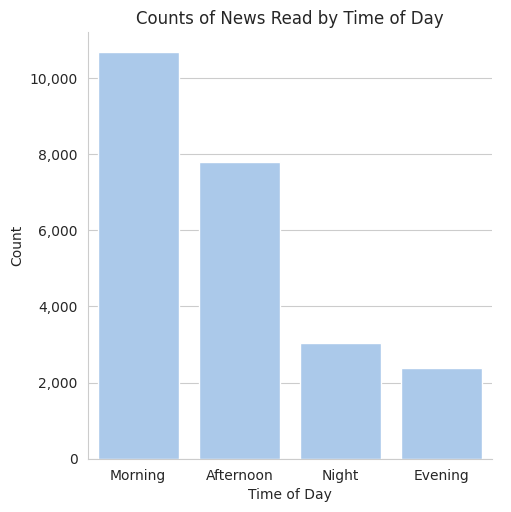

In [ ]:
# Simiao contributed to the visual improvement of this plot
# Visualize using seaborn
sns.set_style('whitegrid')
sns.set_palette('pastel')

time = sampled_test.copy()
time['Time_of_Day'] = time['Time_of_Day'].replace({'morning': 'Morning', 'afternoon': 'Afternoon', 'evening': 'Evening', 'night': 'Night'})
T = sns.catplot(x="Time_of_Day", kind="count", data=time, order=time['Time_of_Day'].value_counts().index, height=5, aspect=1)

for ay in T.axes.flat:
    ay.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))

T.set(title='Counts of News Read by Time of Day', xlabel='Time of Day', ylabel='Count')
plt.show()

## Popular Entities

To understand what entities are the most popular among all the news we have in the dataset, we will clean the 'TitleEnt' column to look into the frequency of each entity.

In [ ]:
# Create a new column of Labels
def extract_labels(row):
    try:
        if pd.notnull(row) and isinstance(row, str):
            objects = json.loads(row)
            labels = [obj['Label'].replace(" ", "_").replace(",", "_") for obj in objects]
            return labels
        else:
            return []
    except Exception as e:
        return []

test_n_df['Labels'] = test_n_df['TitleEnt'].apply(extract_labels)
test_n_df.head()

,NewsId,Category,SubCat,Title,Abstract,TitleEnt,AbstractEnt,Labels
0,N88753,lifestyle,lifestyleroyals,"The Brands Queen Elizabeth, Prince Charles, an...","Shop the notebooks, jackets, and more that the...","[{""Label"": ""Prince Philip, Duke of Edinburgh"",...",[],"[Prince_Philip__Duke_of_Edinburgh, Charles__Pr..."
1,N45436,news,newsscienceandtechnology,Walmart Slashes Prices on Last-Generation iPads,Apple's new iPad releases bring big deals on l...,"[{""Label"": ""IPad"", ""Type"": ""J"", ""WikidataId"": ...","[{""Label"": ""IPad"", ""Type"": ""J"", ""WikidataId"": ...","[IPad, Walmart]"
2,N23144,health,weightloss,50 Worst Habits For Belly Fat,These seemingly harmless habits are holding yo...,"[{""Label"": ""Adipose tissue"", ""Type"": ""C"", ""Wik...","[{""Label"": ""Adipose tissue"", ""Type"": ""C"", ""Wik...",[Adipose_tissue]
3,N86255,health,medical,Dispose of unwanted prescription drugs during ...,NaN,"[{""Label"": ""Drug Enforcement Administration"", ...",[],[Drug_Enforcement_Administration]
4,N93187,news,newsworld,The Cost of Trump's Aid Freeze in the Trenches...,Lt. Ivan Molchanets peeked over a parapet of s...,[],"[{""Label"": ""Ukraine"", ""Type"": ""G"", ""WikidataId...",[]


In [ ]:
test_n_df1 = test_n_df.explode('Labels')
test_n_df1

,NewsId,Category,SubCat,Title,Abstract,TitleEnt,AbstractEnt,Labels
0,N88753,lifestyle,lifestyleroyals,"The Brands Queen Elizabeth, Prince Charles, an...","Shop the notebooks, jackets, and more that the...","[{""Label"": ""Prince Philip, Duke of Edinburgh"",...",[],Prince_Philip__Duke_of_Edinburgh
0,N88753,lifestyle,lifestyleroyals,"The Brands Queen Elizabeth, Prince Charles, an...","Shop the notebooks, jackets, and more that the...","[{""Label"": ""Prince Philip, Duke of Edinburgh"",...",[],Charles__Prince_of_Wales
0,N88753,lifestyle,lifestyleroyals,"The Brands Queen Elizabeth, Prince Charles, an...","Shop the notebooks, jackets, and more that the...","[{""Label"": ""Prince Philip, Duke of Edinburgh"",...",[],Elizabeth_II
1,N45436,news,newsscienceandtechnology,Walmart Slashes Prices on Last-Generation iPads,Apple's new iPad releases bring big deals on l...,"[{""Label"": ""IPad"", ""Type"": ""J"", ""WikidataId"": ...","[{""Label"": ""IPad"", ""Type"": ""J"", ""WikidataId"": ...",IPad
1,N45436,news,newsscienceandtechnology,Walmart Slashes Prices on Last-Generation iPads,Apple's new iPad releases bring big deals on l...,"[{""Label"": ""IPad"", ""Type"": ""J"", ""WikidataId"": ...","[{""Label"": ""IPad"", ""Type"": ""J"", ""WikidataId"": ...",Walmart
...,...,...,...,...,...,...,...,...
120954,N30717,travel,travelarticle,Perfect North Slopes purchases bankrupt West V...,Perfect North Slopes is expanding its reach wi...,"[{""Label"": ""Perfect North Slopes"", ""Type"": ""S""...","[{""Label"": ""Perfect North Slopes"", ""Type"": ""S""...",West_Virginia
120955,N56897,sports,basketball_ncaa,Arizona Wildcats basketball dismisses Devonair...,Arizona basketball coach Sean Miller announced...,"[{""Label"": ""Arizona Wildcats"", ""Type"": ""U"", ""W...","[{""Label"": ""Sean Miller"", ""Type"": ""P"", ""Wikida...",Arizona_Wildcats
120956,N108404,video,news,Concerns continue to grow over Trump's busines...,After Kentucky Governor Matt Bevin spent two n...,"[{""Label"": ""Donald Trump"", ""Type"": ""P"", ""Wikid...","[{""Label"": ""Citizens for Responsibility and Et...",Donald_Trump
120957,N74617,autos,autossports,Best Sports Car Deals for October,NaN,"[{""Label"": ""Peugeot RCZ"", ""Type"": ""V"", ""Wikida...",[],Peugeot_RCZ


In [ ]:
count_labels = test_n_df1['Labels'].value_counts()
n = 20
top_labels = count_labels.head(n)
print(top_labels)

Donald_Trump                        2909
National_Football_League            1174
New_England_Patriots                1072
Houston_Astros                       808
United_States                        739
California                           734
Cleveland_Browns                     647
Philadelphia_Eagles                  603
Pittsburgh_Steelers                  594
Republican_Party_(United_States)     584
Dallas_Cowboys                       578
Florida                              571
New_York_Yankees                     566
Democratic_Party_(United_States)     565
Houston_Texans                       547
Ukraine                              534
Baltimore_Ravens                     520
Indianapolis_Colts                   516
Halloween                            514
Detroit_Lions                        495
Name: Labels, dtype: int64
